In [1]:
%matplotlib inline

In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [3]:
#Generar conjunto de datos

In [4]:
centroids = [[2, 2], [-2, -2], [2, -2],[-2, 2]]
X, labels_true = make_blobs(n_samples=300, centers=centroids, cluster_std=0.5,random_state=0)

[AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

In [5]:
#Algoritmo que no necesita conocer el número de clusters o agrupaciones que puede haber
#entrenamos pasándole los datos de entrada
#el atributo preference hace referencia a cómo de similares son los datos
#los mejores resultados se tienen con valores negativos
af = AffinityPropagation(preference=-30).fit(X)
cluster_centers_indices = af.cluster_centers_indices_

#en el atributo labels_ tendremos las etiquetas que el algoritmo no ha asignado
labels = af.labels_
print(labels)

n_clusters_ = len(cluster_centers_indices)

print('Num clusters estimados: %d' % n_clusters_)
print("Homogeniedad: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Complenitud: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

[2 0 1 0 2 0 3 3 0 2 3 2 2 3 0 3 3 1 1 1 2 0 2 2 1 2 1 0 1 0 1 3 0 1 3 0 0
 1 0 0 2 2 1 2 1 1 3 3 1 2 0 2 3 0 1 0 1 0 1 2 3 0 0 3 1 3 3 0 0 2 0 1 2 0
 3 3 1 0 2 3 1 2 3 1 1 2 2 0 3 0 1 2 1 2 1 2 1 3 0 3 0 2 3 0 2 1 0 3 0 1 0
 1 1 1 2 1 3 3 1 3 1 0 1 1 0 0 0 3 1 3 2 3 3 1 2 1 2 3 1 2 3 3 3 2 3 2 0 1
 3 1 0 2 2 2 0 2 1 2 0 2 2 3 0 2 1 3 3 0 2 0 2 3 3 2 2 2 2 3 3 2 1 2 2 1 3
 2 1 3 2 1 0 1 2 3 1 1 2 3 2 3 2 2 1 1 1 0 0 2 3 3 0 1 0 1 2 3 2 2 3 2 0 1
 2 0 1 3 1 0 2 0 3 3 3 1 1 2 1 0 2 1 1 1 0 0 3 2 2 1 0 3 1 3 0 2 3 3 2 0 0
 1 1 2 0 0 0 2 3 3 0 0 2 0 0 0 3 1 3 0 0 3 3 3 0 3 2 3 1 2 3 1 0 1 1 0 0 3
 0 0 3 3]
Num clusters estimados: 4
Homogeniedad: 1.000
Complenitud: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


Centroide:  [-2.06644029 -2.14889544]
Centroide:  [ 1.9691868  -2.05365264]
Centroide:  [ 2.03325861  2.15123595]
Centroide:  [-2.10144842  1.94505861]


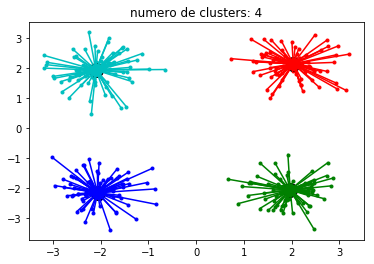

In [6]:
import matplotlib.pyplot as pltmatplotlib
from itertools import cycle
import matplotlib.pyplot as plt

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    print("Centroide: ", cluster_center)
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('numero de clusters: %d' % n_clusters_)
plt.show()